# Welcome! To Code execution testing colab for Data Analysis Tasks!
### How to use
1. Make a copy of this file (*File -> Save copy in drive*).
2. Rename your copy whit this convention:
  1. *( id for the task ).ipynb*
  2. For example: *DCA1.ipynb*
2. Install the libraries.
3. Open the [Drive in the sheets](https://drive.google.com/drive/folders/1a7_txX6YoAqOqI7XBxg4B7VqOerrm_dn)
4. Read the instructions for mount this Drive.
5. Create your code according to the instructions.
6. When you finish, run the code, and save the colab (Ctrl + s).
7. Go to Share --> *Select **Anyone with the link** --> Editor*
8. Paste the link to the colab in the sheets for tasking in the column **Colab Link**

### Useful Docs
1. [Matplotlib usage examples](https://colab.research.google.com/notebooks/charts.ipynb#scrollTo=xNzEBRkzL3B0)
2. [PEP8-Style Guide For Python](https://peps.python.org/pep-0008/)


In [ ]:
!pip install matplotlib mpmath numpy pandas sympy bokeh

## Code Execution
When you make the copy, you can use the code block below to execute your code.

## How to Add shared folder with me on personal gdrive.


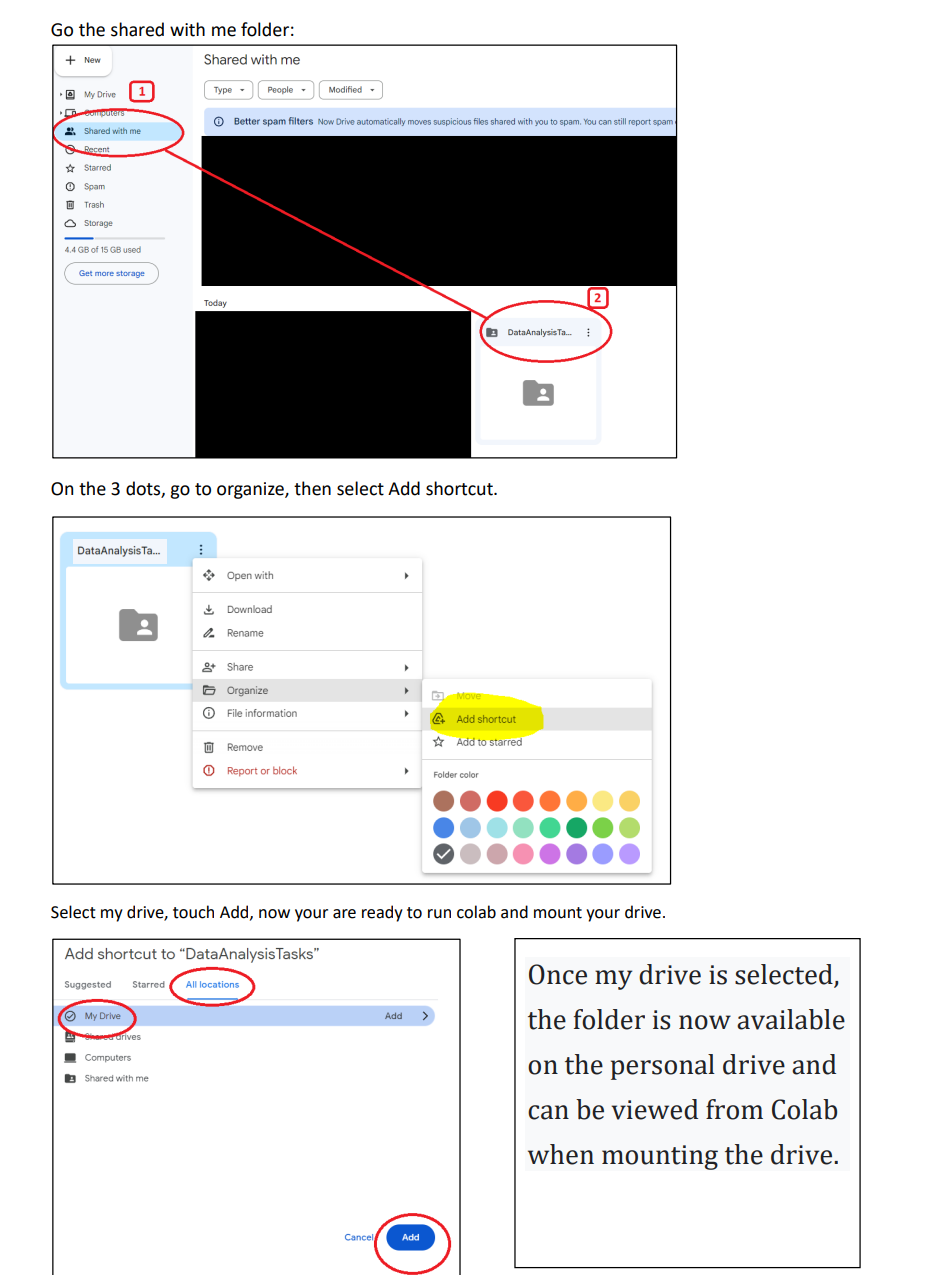

In [1]:
from google.colab import drive

drive.mount("/content/gdrive", force_remount=True)


Mounted at /content/gdrive


EXAMPLE FOR TEST THE CORRECT MOUNT OF GDRIVE

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

try:
    # Read the workout data from the CSV file
    df = pd.read_csv("/content/gdrive/MyDrive/DataAnalysisTasks/Datasets/company_dataset.csv")
    df.head()
    print("CSV file loaded successfully, you can start working right now")
except Exception as e:
    print(f"An error occurred while loading the CSV file: {e}, please check the correct mount of the shared folder")


CSV file loaded successfully, you can start working right now


## For interactive Bokeh plot this code has to be inside the cell of the Bokeh code.

In [ ]:
from bokeh.io import output_notebook
output_notebook()

-------------------------------------------------------------------------------------------------------------------




---



**AFTER THIS POINT YOU CAN START WORKING**

---








In [15]:
import pandas as pd
import numpy as np
from bokeh.io import output_notebook, show
from bokeh.models import ColumnDataSource, CustomJS
from bokeh.plotting import figure
from bokeh.models.layouts import Column
from bokeh.models.widgets import Select, Slider

def load_data(filepath):
    """
    Load and preprocess the dataset.

    Args:
    - filepath (str): Path to the CSV data file.

    Returns:
    - DataFrame: Preprocessed data.
    """
    data = pd.read_csv(filepath)
    data.fillna(0, inplace=True)
    return data

def create_box_plot(data):
    """
    Create a box plot for the distribution of total interests by group.

    Args:
    - data (DataFrame): Data for plotting.

    Returns:
    - Figure: Box plot visualization.
    """
    p = figure(title="Distribution of Total Interests by Group", x_axis_label='Groups', y_axis_label='Total Interests',
               tools="box_select,reset", x_range=data['group'].unique(), height=600, width=1200)

    # Compute the quartiles for each group
    q1 = data.groupby('group')['grand_tot_interests'].quantile(0.25)
    q2 = data.groupby('group')['grand_tot_interests'].quantile(0.5)
    q3 = data.groupby('group')['grand_tot_interests'].quantile(0.75)
    iqr = q3 - q1
    upper = q3 + 1.5*iqr
    lower = q1 - 1.5*iqr

    # Get integer indices for the groups
    group_indices = list(range(len(q1.index)))

    # Plot the boxes using the quad glyph
    p.quad(bottom=q1.values, top=q3.values, left=[i - 0.2 for i in group_indices],
           right=[i + 0.2 for i in group_indices], color="skyblue")

    # Plot the whiskers using the segment glyph
    p.segment(group_indices, lower.values, group_indices, q1.values, line_width=2, line_color="black")
    p.segment(group_indices, upper.values, group_indices, q3.values, line_width=2, line_color="black")

    # Plot the medians using the circle glyph
    p.circle(group_indices, q2.values, size=10, color="red", legend_label="Median")

    return p

def create_interest_bar_plot(data):
    """
    Create a bar plot for the most popular interests.

    Args:
    - data (DataFrame): Data for plotting.

    Returns:
    - Figure: Bar plot visualization.
    - ColumnDataSource: Data source for the plot.
    """
    interest_sum = data.iloc[:, 2:].sum().sort_values(ascending=False)
    interest_sum = interest_sum.iloc[0:50]
    source = ColumnDataSource(data=dict(interests=interest_sum.index.tolist(), counts=interest_sum.values.tolist()))

    p = figure(y_range=interest_sum.index.tolist(), title="Most Popular Interests",
               x_axis_label='Count', tools="box_select,reset", height=600, width=1200)
    p.hbar(y='interests', right='counts', height=0.4, source=source)

    return p, source

def create_specific_interest_plot(data, initial_interest='interest1'):
    """
    Create a plot for the distribution of a specific interest by group.

    Args:
    - data (DataFrame): Data for plotting.
    - initial_interest (str): Initial interest to plot.

    Returns:
    - Figure: Specific interest distribution plot.
    - ColumnDataSource: Data source for the plot.
    """
    group_counts = data.groupby('group')[initial_interest].sum()
    source = ColumnDataSource(data=dict(groups=group_counts.index.tolist(), counts=group_counts.values.tolist()))

    p = figure(x_range=group_counts.index.tolist(), title=f"Distribution of {initial_interest} by Group",
               y_axis_label='Count', tools="box_select,reset", height=600, width=1200)
    p.vbar(x='groups', top='counts', width=0.7, source=source, color="navy")

    return p, source

def main():
    # Load and preprocess data
    data = load_data('/content/gdrive/MyDrive/DataAnalysisTasks/Datasets/people_interests_group.csv')

    # Create the box plot
    p1 = create_box_plot(data)

    # Create the bar plot for popular interests
    _, source_total = create_interest_bar_plot(data.copy())
    p2, source2 = create_interest_bar_plot(data)

    # Add a slider for interactivity
    slider_callback = CustomJS(args=dict(source=source2, source_total=source_total), code="""
        var data = source.data;
        var data_total = source_total.data;
        var selectedValue = cb_obj.value;
        var original_interests = data_total['interests'];
        var original_counts = data_total['counts'];
        var interests = [];
        var counts = [];
        for (var i = 0; i < selectedValue; i++) {
            interests.push(original_interests[i]);
            counts.push(original_counts[i]);
        }
        data['interests'] = interests;
        data['counts'] = counts;
        source.change.emit();
    """)
    slider = Slider(start=5, end=50, value=50, step=1, title="Top N Interests")
    slider.js_on_change('value', slider_callback)

    # Create the plot for specific interest distribution
    p3, source3 = create_specific_interest_plot(data)

    # Dropdown menu for selecting interest
    data_dict = {column: data[column].tolist() for column in data.columns[2:]}
    select_callback = CustomJS(args=dict(data_dict=data_dict, plot_source=source3), code="""
        var selectedInterest = cb_obj.value;
        var counts = data_dict[selectedInterest];
        plot_source.data['counts'] = counts;
        plot_source.change.emit();
    """)
    select = Select(title="Select Interest", value="interest1", options=list(data.columns[2:]))
    select.js_on_change('value', select_callback)

    # Combine all plots and widgets
    layout = Column(children=[slider, p2, select, p3, p1])
    output_notebook()
    show(layout)

# Run the main function
main()